In [23]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from skimage import color

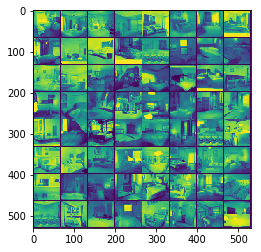

(530, 530)

In [3]:
# Load an color image in grayscale
img = cv2.imread('image666.png',0)
plt.imshow(img)
plt.show()
img.shape



In [10]:
def isGrayScale(img):
    if(len(img.shape)<3):
        return True
    else :
        return False

In [11]:
#https://stackoverflow.com/questions/6646371/detect-which-image-is-sharper
def sharpness(img): 
    if not isGrayScale(img):
        img = color.rgb2gray(img)
    array = np.array(img, dtype=np.int32)
    gy, gx = np.gradient(array)
    gnorm = np.sqrt(gx**2 + gy**2)
    sharpness = np.average(gnorm)
    return sharpness  

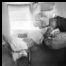

In [74]:
img1 = Image.open('image666.png').convert('LA')
area = (0,0,66.5,66.5)
img1.crop(area)

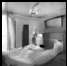

In [61]:
area2 = (66.5,0,133,66.5)
img1.crop(area2)

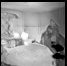

In [62]:
area3 = (133,0,199.5,66.5)
img1.crop(area3)

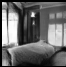

In [63]:
# 2nd row
area4 = (0,66.5,66.5,133)  #(x1,y1,x2,y2)
img1.crop(area4)

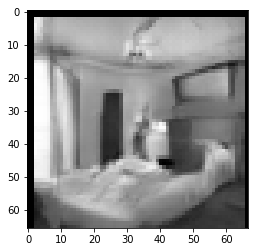

In [64]:
area2 = (66.5,0,133,66.5)
cropImage1 = img1.crop(area2)
plt.imshow(cropImage1)
plt.show()

In [49]:
type(cropImage1)

PIL.Image.Image

In [50]:
pix1 = np.array(cropImage1.convert('L'))
type(pix1)

numpy.ndarray

In [51]:
val1 = sharpness(pix1)
print(val1)

20.516421012793153


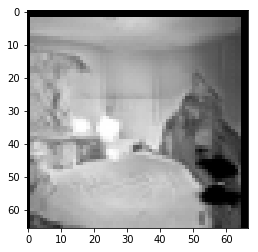

In [52]:
area3 = (133,0,199.5,66.5)
cropImage2 = img1.crop(area3)
plt.imshow(cropImage2)
plt.show()

In [54]:
pix2 = np.array(cropImage2.convert('L'))
type(pix2)
val2 = sharpness(pix2)
print(val2)

16.57733715317618


In [72]:
#(x1,y1,x2,y2)
n = 530
lst = []
for i in range(0,8):
    lst.append((n*i)/8)
lst

[0.0, 66.25, 132.5, 198.75, 265.0, 331.25, 397.5, 463.75]

In [79]:
sharpnesslist = []
for col in lst:
    for row in lst:
        area = (row,col,row+(n/8),col+(n/8))
        print("Area is ",area)
        cropped_image = img1.crop(area)
        val = sharpness(np.array(cropped_image.convert('L')))
        print("Val is ",val)
        sharpnesslist.append(val)

print(sharpnesslist)
print("Sum is ",sum(sharpnesslist))
print("Average is ",sum(sharpnesslist)/len(sharpnesslist))

        
        


Area is  (0.0, 0.0, 66.25, 66.25)
Val is  16.393067425690873
Area is  (66.25, 0.0, 132.5, 66.25)
Val is  18.901440063636674
Area is  (132.5, 0.0, 198.75, 66.25)
Val is  16.020688577870892
Area is  (198.75, 0.0, 265.0, 66.25)
Val is  16.84772276564644
Area is  (265.0, 0.0, 331.25, 66.25)
Val is  30.055064959986435
Area is  (331.25, 0.0, 397.5, 66.25)
Val is  15.25483539613604
Area is  (397.5, 0.0, 463.75, 66.25)
Val is  14.691822828184922
Area is  (463.75, 0.0, 530.0, 66.25)
Val is  20.03241225712311
Area is  (0.0, 66.25, 66.25, 132.5)
Val is  20.712976984480612
Area is  (66.25, 66.25, 132.5, 132.5)
Val is  14.403523813032418
Area is  (132.5, 66.25, 198.75, 132.5)
Val is  22.778877603307006
Area is  (198.75, 66.25, 265.0, 132.5)
Val is  21.98804088735109
Area is  (265.0, 66.25, 331.25, 132.5)
Val is  21.360096850797515
Area is  (331.25, 66.25, 397.5, 132.5)
Val is  12.025674622423587
Area is  (397.5, 66.25, 463.75, 132.5)
Val is  14.009294503877584
Area is  (463.75, 66.25, 530.0, 132.5)